---
title: "Exploratory Data Analysis"
format:
    html: 
        code-fold: true
execute:
    warning: false
---


{{< include overview.qmd >}} 

{{< include methods.qmd >}} 

# Code 

Code for this webpage can be found [here.](https://github.com/dsan-5000/project-dcorc7/blob/main/technical-details/eda/main.ipynb)

## Importing Python Libraries

The first step in the data cleaning process is to import the appropriate Python libaries. The Python packages that I imported, as well as the reasons for importing them, are as follows:
  
- **pandas:** To work with and store retrieved data into pandas dataframes

- **numpy:** To perform statistical and mathematic operations (manipulate a correlation matrix)

- **matplotlib:** To create professional-looking statiscal plots on the cleaned movie data

- **seaborn:** To accompany the plots made using the matplotlib library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Cleansed Data CSV

To begin, I loaded the cleansed movie data csv into a Pandas dataframe.

In [2]:
movies_df = pd.read_csv("../../data/processed-data/movies_cleaned.csv")

## Univariate Data Analysis

Within univariate data analysis, only one variable in the cleaned movie dataset will be examined at a time. Univariate data analysis allows for the analysis of feature distributions without the distraction of other variables. The variables I have chosen to investigate in this step are: Budget, Revenue, Ratings, Genre, and Age Rating.

### Movie Finances

Below are histograms depicting the movie dataset's distribution of normalized budgets and revenues. It is important to state that the means of the Budget and Revenue columns are $56,821,428 and $211,361,268, respectively, so although most movies are grouped towards a lower-end, they are still costing and making a significant amount of money. Both variables are highly skewed to the left, resembling an exponential distribution. This distribution shape suggests that large values for both variables are much less frequent but have a strong impact on the overall distributions, leading to a significant spread of values across both categories. The few outliers in each plot could possibly be represent extreme blockbuster movies. 

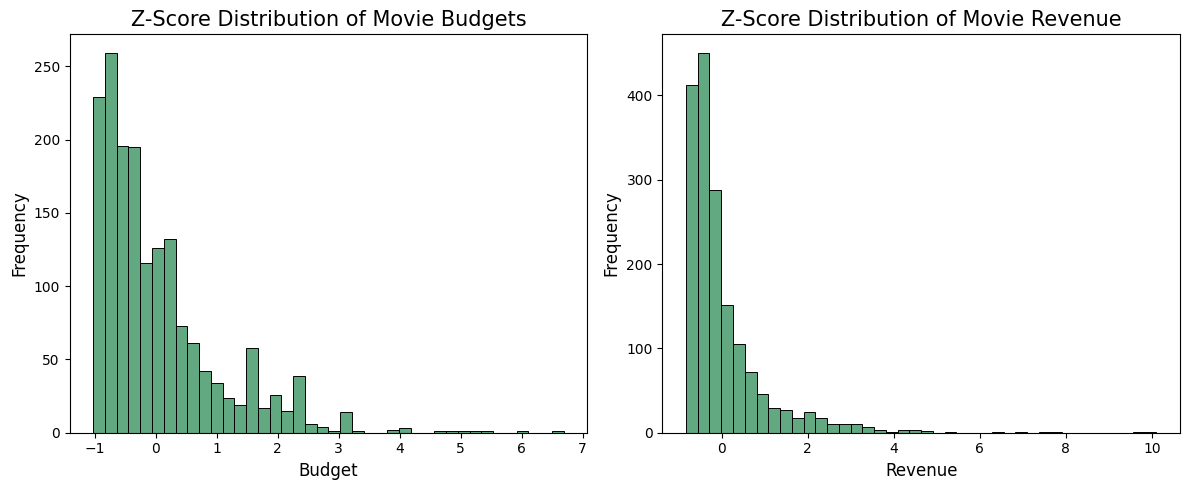

In [3]:
# Create a figure with 1 row and 2 columns of subplots so that graphs can be side-by-side
fig, axes = plt.subplots(1, 2, figsize = (12, 5))

# Create seaborn histogram of movie budgets
sns.histplot(movies_df["Budget_Normalized"], bins = 40, color = "seagreen", ax = axes[0])
axes[0].set_title("Z-Score Distribution of Movie Budgets", fontsize = 15)
axes[0].set_xlabel("Budget", fontsize = 12)
axes[0].set_ylabel("Frequency", fontsize = 12)

# Create seaborn histogram of movie revenue
sns.histplot(movies_df["Revenue_Normalized"], bins = 40, color = "seagreen", ax = axes[1])
axes[1].set_title("Z-Score Distribution of Movie Revenue", fontsize = 15)
axes[1].set_xlabel("Revenue", fontsize = 12)
axes[1].set_ylabel("Frequency", fontsize = 12)

plt.tight_layout()
plt.show()

### Movie Ratings

Below are density plots depicting the distribution of ratings for each of the 5 movie rating methods. Each rating system is measured from a scale from 1 to 10, and there is no deviation in what movies have been rated. From these graphs, we can see that each rating system has vastly different spreads for the same movies. Metascore ratings are the most normally distributed, with it's peak density hovering around 4-6. Both IMDB and TMDB ratings are skewed to the right and have steep drop offs, suggesting that both systems tend to not award extreme scores. The Rotten Tomatoes rating distribution has a lower density for each number rating, but is spread out across all of the available ratings. Unlike most of the other rating systems, Rotten Tomatoes is not shy to give really bad or really good ratings. Lastly, the Average Rating depicts few extreme (1 or 10) rating values and suggests that most movies are clustered towards the middle of the scale (5-8).

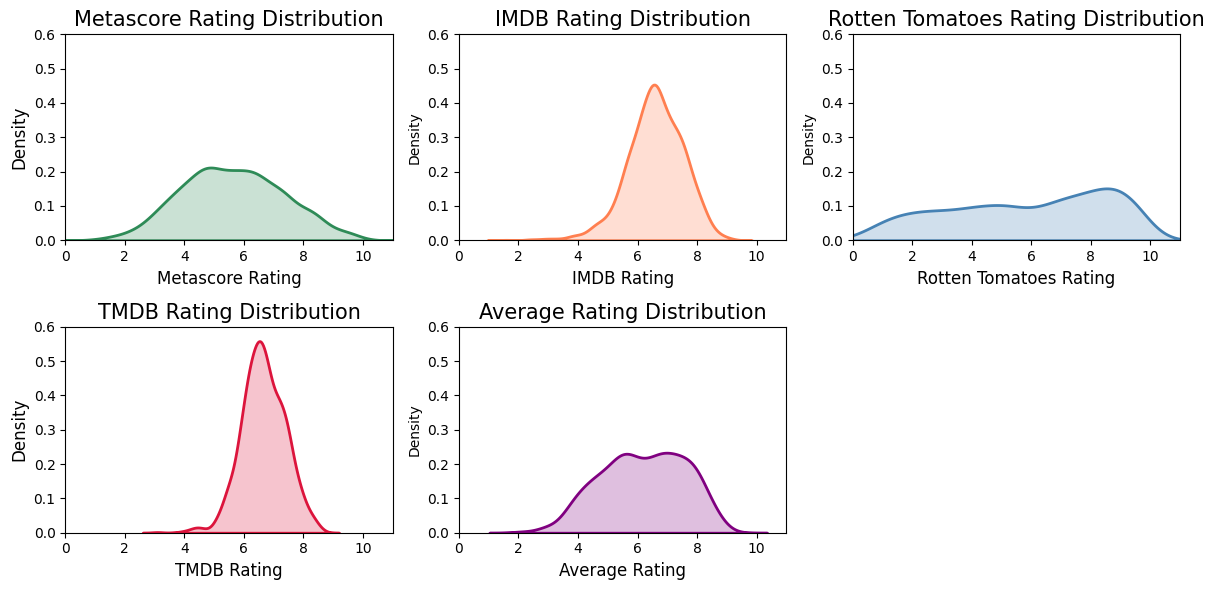

In [4]:
# Create a figure with 2 row and 3 columns of subplots so that graphs can be side-by-side
fig, axes = plt.subplots(2, 3, figsize = (12, 6))

# KDE plot for Metascore Rating
sns.kdeplot(movies_df["Metascore_Rating"], fill = True, color = "seagreen", linewidth = 2, ax = axes[0, 0])
axes[0, 0].set_title("Metascore Rating Distribution", fontsize = 15)
axes[0, 0].set_xlabel("Metascore Rating", fontsize = 12)
axes[0, 0].set_ylabel("Density", fontsize = 12)
axes[0, 0].set_xlim(0, 11)
axes[0, 0].set_ylim(0, 0.6)

# KDE plot for IMDB Rating
sns.kdeplot(movies_df["IMDB_Rating"], fill = True, color = "coral", linewidth = 2, ax = axes[0, 1])
axes[0, 1].set_title("IMDB Rating Distribution", fontsize = 15)
axes[0, 1].set_xlabel("IMDB Rating", fontsize = 12)
axes[0, 1].set_xlim(0, 11)
axes[0, 1].set_ylim(0, 0.6)

# KDE plot for Rotten Tomatoes Rating
sns.kdeplot(movies_df["Rotten_Tomatoes_Rating"], fill = True, color = "steelblue", linewidth = 2, ax = axes[0, 2])
axes[0, 2].set_title("Rotten Tomatoes Rating Distribution", fontsize = 15)
axes[0, 2].set_xlabel("Rotten Tomatoes Rating", fontsize = 12)
axes[0, 2].set_xlim(0, 11)
axes[0, 2].set_ylim(0, 0.6)

# KDE plot for TMDB Rating
sns.kdeplot(movies_df["TMDB_Rating"], fill = True, color = "crimson", linewidth = 2, ax = axes[1, 0])
axes[1, 0].set_title("TMDB Rating Distribution", fontsize = 15)
axes[1, 0].set_xlabel("TMDB Rating", fontsize = 12)
axes[1, 0].set_ylabel("Density", fontsize = 12)
axes[1, 0].set_xlim(0, 11)
axes[1, 0].set_ylim(0, 0.6)

# KDE plot for Average Rating
sns.kdeplot(movies_df["Average_Rating"], fill = True, color = "purple", linewidth = 2, ax = axes[1, 1])
axes[1, 1].set_title("Average Rating Distribution", fontsize = 15)
axes[1, 1].set_xlabel("Average Rating", fontsize = 12)
axes[1, 1].set_xlim(0, 11)
axes[1, 1].set_ylim(0, 0.6)

axes[1, 2].axis("off")
plt.tight_layout()
plt.show()

### Classification Variable Analysis

The plots below depict the count of movies released per month and the count of movies within each age rating. The count of movies released per month plot shows that January is the month in which the least movies are released, while December and June are the months in which the most movies are released. This trend could be due to a couple of reasons. Summer and Winter (around Christmas) are seasons in which children are out of school and are freed up enough to watch movies in the threater. Second, the Academy Award season starts in Janaury with the Golden Globes and ends in March with the Oscars. Movies released in December may want to prey on recency bias by releasing so soon to the start of the awards ceremonies and right before the year ends. As for the age_rating distribution, PG-13 and R rated movies are by far the most represented. As opposed to G and PG movies, PG-13 and R rated movies are targeted at a more mature, and wide ranging, audience. One factor that could be influencing this result is that this dataset contains movies within the Horror and Thriller genres, so most of those movies in those cateogries will not be rated below PG-13, or even R.

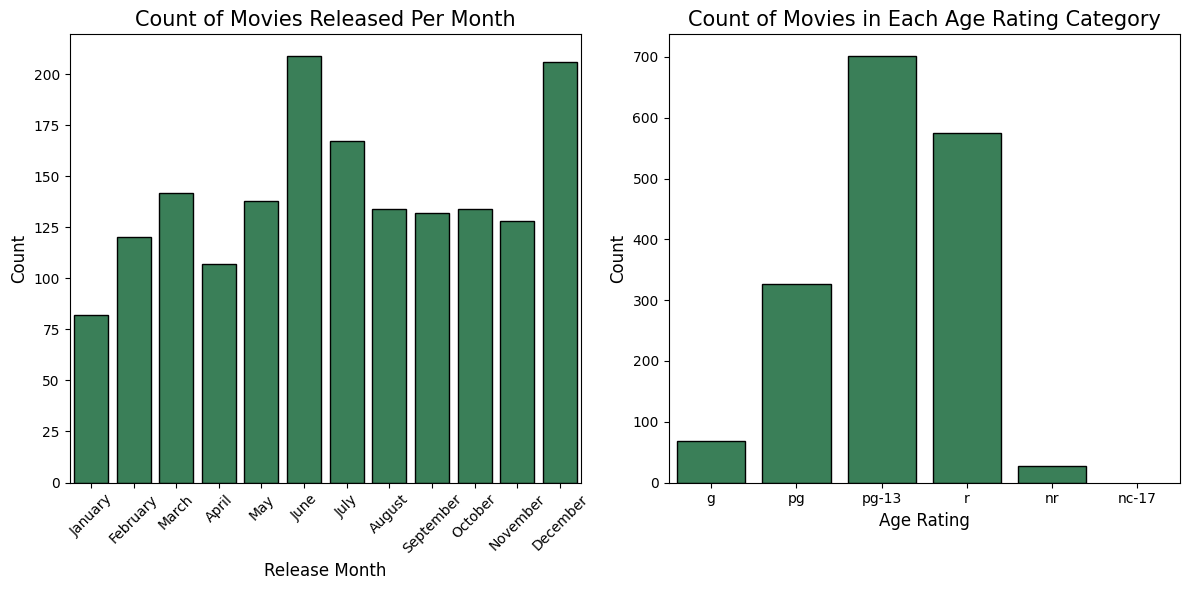

In [5]:
# Create a figure with 1 row and 2 columns of subplots so that graphs can be side-by-side
fig, axes = plt.subplots(1, 2, figsize = (12, 6))

# Order months chronologically
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

# Release Month bar plot
sns.countplot(data = movies_df, x = "Release_Month", color = "seagreen", edgecolor = "black", ax = axes[0], order = month_order)
axes[0].set_title("Count of Movies Released Per Month", fontsize = 15)
axes[0].set_xlabel("Release Month", fontsize = 12)
axes[0].set_ylabel("Count", fontsize = 12)
axes[0].tick_params(axis = "x", rotation = 45)


# Order Age Ratings by age level
age_rating_order = ["g", "pg", "pg-13", "r", "nr", "nc-17"]

# Age Rating bar plot
sns.countplot(data = movies_df, x = "Age_Rating", color = "seagreen", edgecolor = "black", ax = axes[1], order = age_rating_order)
axes[1].set_title("Count of Movies in Each Age Rating Category", fontsize = 15)
axes[1].set_xlabel("Age Rating", fontsize = 12)
axes[1].set_ylabel("Count", fontsize = 12)
plt.tight_layout()
plt.show()

## Multivariate Data Analysis

Within multivariate data analysis, many variables are examined simultaneously. Mulitvariate data analysis allows for the identification of trends and patterns among variables in the dataset. The relationships I have chosen to investigate in this step are: Budget vs Revenue vs Age Rating, Correlation of All Numerical Data, Budget vs Revenue vs Awards Won, Release Month vs Revenue, Awards Won vs Rating

### Budget vs Revenue vs Age Rating

Below is a scatterplot that explores the relatinship between a movie's Budget and Revenue, categorized by their Age Rating. Just looking at Budget and Revenue, there is a positive correlation between the two variables, with a few exceptions. Generally, as the budget of a movie increases, so does it's accumulated box office revenue. As for how a movie's Age Rating is involved, some potential insights can be made. PG-13 movies are by far the most successful out of all the listed Age Ratings. This could be due to PG-13 movies being available to a wider audience, especially to children and teens. Similarly, PG and G movies seem to make the next highest revenues, probably for the same reasons. On the other hand, rated R movies both have the lowest budgets and the lowest revenues. This could be a result of movie production companies not wanting to take the risk on movies not suitable for a wide audience or the substance of the movie could be too polarizing (gore, violence, language).

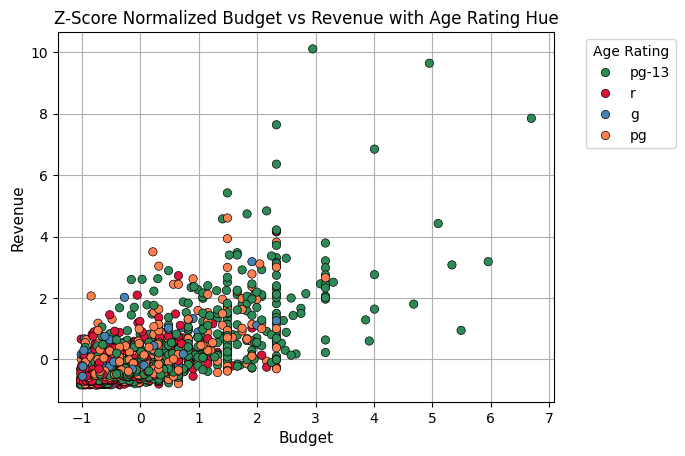

In [9]:
# Scatterplot of Budget vs Revenue categorized by Age Rating
movies_df_main_genres = movies_df[~movies_df["Age_Rating"].isin(["nr", "nc-17"])]

sns.scatterplot(data = movies_df_main_genres, x = "Budget_Normalized", y = "Revenue_Normalized", hue = "Age_Rating", palette = {"g": "steelblue", "pg": "coral", "pg-13": "seagreen", "r": "crimson"}, edgecolor = "black", zorder = 2)
plt.title("Z-Score Normalized Budget vs Revenue with Age Rating Hue", fontsize = 12)
plt.xlabel("Budget", fontsize = 11)
plt.ylabel("Revenue", fontsize = 11)
plt.legend(title = "Age Rating", bbox_to_anchor = (1.05, 1))

plt.grid(zorder = 0)
plt.show()

### Numerical Variable Correlation Matrix

Below is a correlation matrix of all numerical datatypes within the cleansed movie dataset. A correlation matrix details the strength and direction of relationships among quantititative variables in a dataset. Variables have strong correlations if the value between them ranges from -1 to -0.33 or 0.33 to 1 (perfect correlations being -1 or 1), a positive correlation if the value is above 0, a negative correlation if the value is below 0, and no correlation if the value is exactly 0. In the correlation matrix generated, a few interesting insghts can be made. As expected, all of the rating variables are highly correlated with one another. Great movies will be consistently rated highly and bad movies will consitently be rated poorly. Budget and Revenue, as well as Popularity and Revenue, also have high correlations. This means that when a movie's budget is high, the revenue gained from release also tends to be high. Oscar Wins have an intersting spread to it's correlations. Oscar Wins values have high correlations with all the ratings values and Runtime, but a relatively negative correlation with Year of Release. 

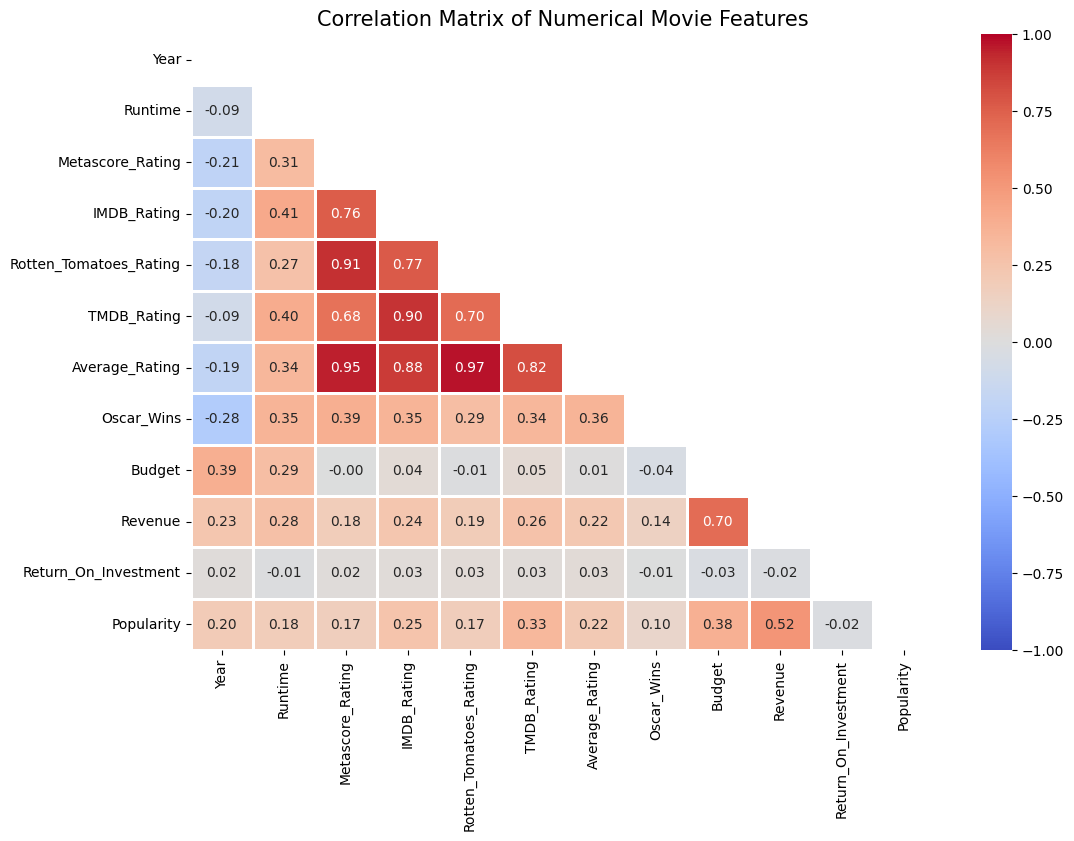

In [7]:
# Create new dataframe with just numerical data, no categorical or text data
columns_to_keep = ["Year", "Runtime", "Metascore_Rating", "IMDB_Rating", "Rotten_Tomatoes_Rating",
                   "TMDB_Rating", "Average_Rating", "Oscar_Wins", "Budget", "Revenue",
                   "Return_On_Investment", "Popularity"]
numerical_movies_df = movies_df[columns_to_keep]

# Create the correlation matrix with numerical movie data
corr_matrix = numerical_movies_df.corr()

# REmove the top right triangle of data to make the matrix easier to read
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))

# Plot correlation Matrix and Heatmap
plt.figure(figsize = (12, 8))
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", mask = mask, vmin = -1, vmax = 1, fmt = ".2f", linewidths = 1)
plt.title("Correlation Matrix of Numerical Movie Features", fontsize = 15)
plt.show()


### Revenue Per Release Month and Genre

Below are two boxplots depicting the distributions of movie revenue per genre and movie revenue per release month. For movie revenue per genre,the median movie revenue hovers around -1 to 1 z score away from the mean box office revenue of $211,361,268. The plot also details that action, comedy, and drama have the highest median box office revenue, while the music genre holds the lowest median box office revenue by far. As for movie revenue per release month, the months with the highest median revenue are May, June, and November. This insight relates back to the previous EDA plot tracking count of movies releaased per month, which told us that most movies in this dataset were released in June and December. Given all of this, it is important to note that each genre and release month has a decent amount of outliers.

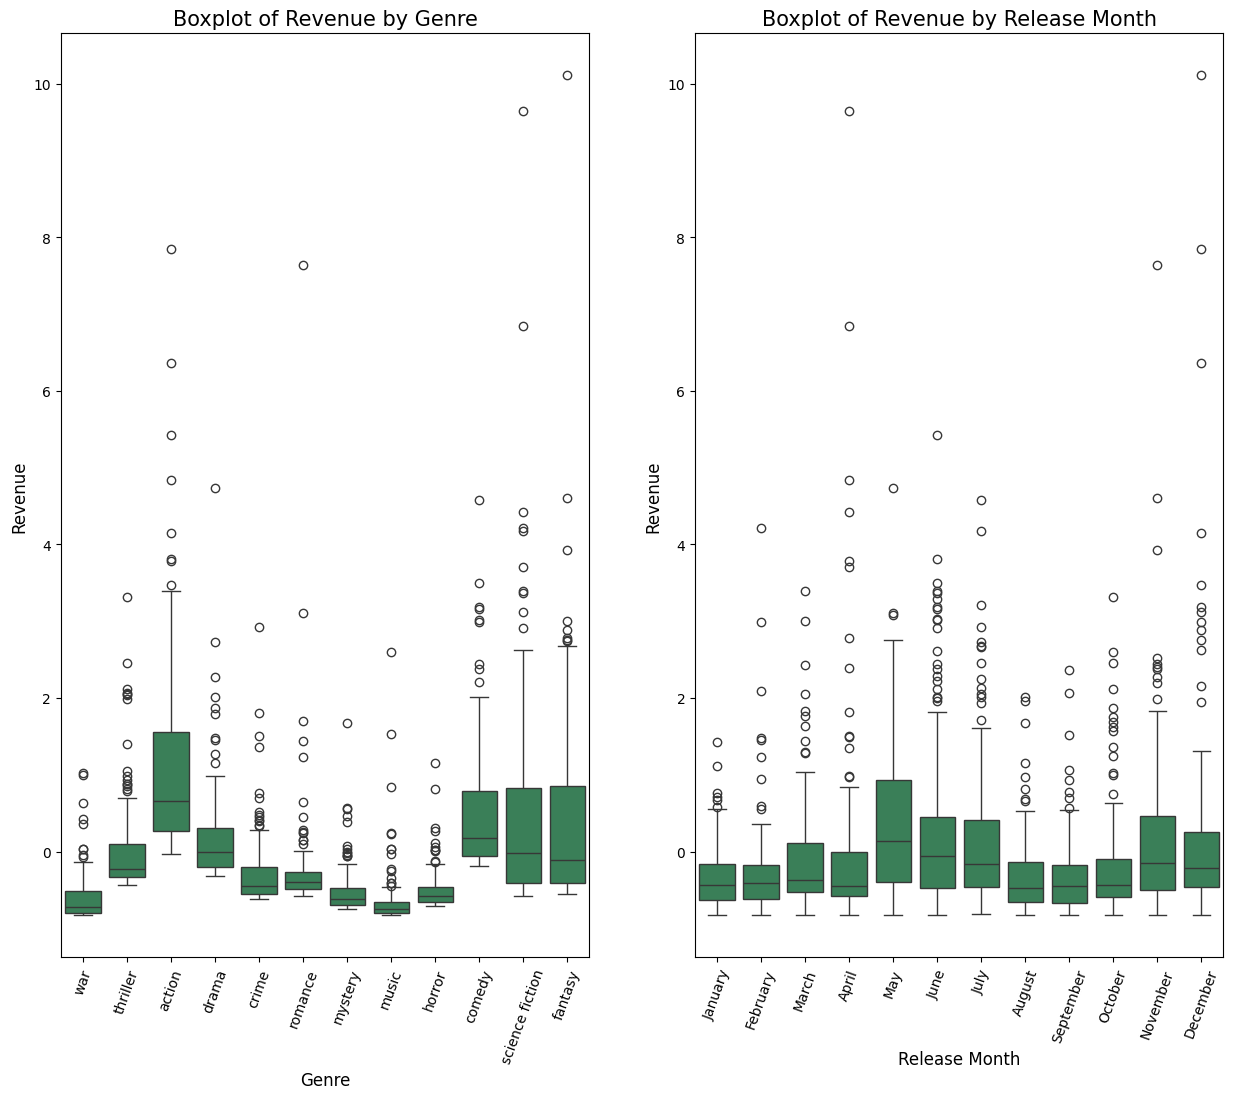

In [8]:
# Order months chronologically
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]


# Create a figure with 1 row and 2 columns of subplots so that graphs can be side-by-side
fig, axes = plt.subplots(1, 2, figsize = (15, 12))

# Create Boxplot of Revenue Per Genre
sns.boxplot(data = movies_df, x = "Genre", y = "Revenue_Normalized", color = "seagreen", ax = axes[0])
axes[0].set_title("Boxplot of Revenue by Genre", fontsize = 15)
axes[0].set_xlabel("Genre", fontsize = 12)
axes[0].set_ylabel("Revenue", fontsize = 12)
axes[0].tick_params(axis = "x", rotation = 70)

# Create Boxplot of Revenue Per Release Month
sns.boxplot(data = movies_df, x = "Release_Month", y = "Revenue_Normalized", color = "seagreen", ax = axes[1], order = month_order)
axes[1].set_title("Boxplot of Revenue by Release Month", fontsize = 15)
axes[1].set_xlabel("Release Month", fontsize = 12)
axes[1].set_ylabel("Revenue", fontsize = 12)
axes[1].tick_params(axis = "x", rotation = 70)

plt.show()

{{< include closing.qmd >}} 